# Training

In [1]:
import torch.nn as nn
from model import *
from utils_ltce import MAPS, Scales, Transform,TransformTrain,extract_features, visualize_output_and_save
from PIL import Image
import os
import torch
import argparse
import json
import numpy as np
from tqdm import tqdm
from os.path import exists,join
import random
import torch.optim as optim
import torch.nn.functional as F
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import torchvision.ops.boxes as bops
from funcs import *

In [10]:
data_path = '/Users/alessandroquattrociocchi/Git/AML/Final_Project/data/'
output_dir = "./logsSave"
test_split = "train" #choices=["train", "test", "val"]
gpu = 0 
learning_rate = 1e-5
anno_file = data_path + 'annotation_FSC147_384.json'
data_split_file = data_path + 'Train_Test_Val_FSC_147.json'
im_dir = data_path + 'images_384_VarV2'
gt_dir = data_path + 'gt_density_map_adaptive_384_VarV2'
pre_trained_backbone = 'resnet' #choices=[resnet,wide_resnet,vgg16]
regressor = CountRegressor(6, pool='mean')
optimizer = optim.Adam(regressor.parameters(), lr = 1e-7)
criterion = nn.MSELoss().cuda()
backbone_model = Resnet50FPN()

In [11]:
if not exists(output_dir):
    os.mkdir(output_dir)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu)

#criterion = nn.MSELoss().cuda()
criterion = nn.MSELoss()

#backbone.cuda()
#backbone.eval()

weights_normal_init(regressor, dev=0.001)
regressor.train()
#regressor.cuda()
optimizer = optim.Adam(regressor.parameters(), lr = learning_rate)

with open(anno_file) as f:
    annotations = json.load(f)

with open(data_split_file) as f:
    data_split = json.load(f)

In [12]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5l6', pretrained=True)

Using cache found in /Users/alessandroquattrociocchi/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-12-8 torch 1.10.0 CPU

Fusing layers... 
Model Summary: 476 layers, 76726332 parameters, 0 gradients
Adding AutoShape... 


In [13]:
import warnings
warnings.filterwarnings("ignore")

Training on FSC147 train set data


  0%|          | 0/5 [00:00<?, ?it/s]

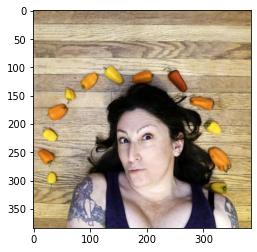

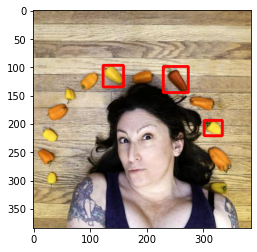

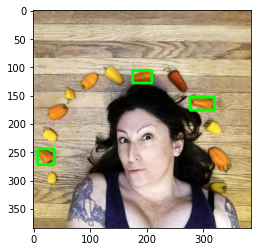

actual:  13.0 -- predicted:   0.0 -- YOLO:   6.0 -- FAMNet error:  13.0 -- YOLO error:   7.0 -- Current MAE:13.00 -- RMSE:13.00 -- Best VAL MAE:10000000.00 -- RMSE: 10000000.00:  20%|██        | 1/5 [00:16<01:04, 16.04s/it]

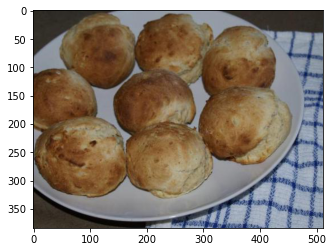

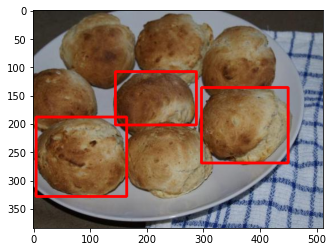

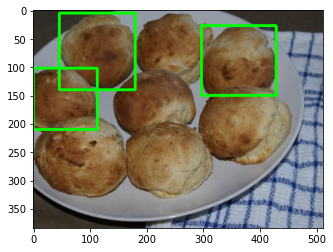

actual:   8.0 -- predicted:   2.0 -- YOLO:   7.0 -- FAMNet error:   6.0 -- YOLO error:   1.0 -- Current MAE: 9.49 -- RMSE:10.12 -- Best VAL MAE:10000000.00 -- RMSE: 10000000.00:  40%|████      | 2/5 [00:35<00:53, 17.99s/it]

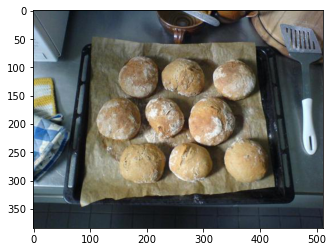

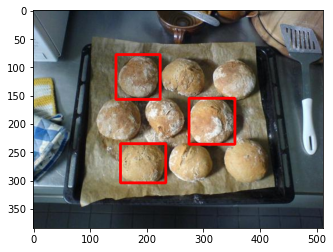

actual:   9.0 -- predicted:   3.7 -- YOLO:   2.0 -- FAMNet error:   5.3 -- YOLO error:   7.0 -- Current MAE: 8.08 -- RMSE: 8.80 -- Best VAL MAE:10000000.00 -- RMSE: 10000000.00:  60%|██████    | 3/5 [00:46<00:30, 15.06s/it]

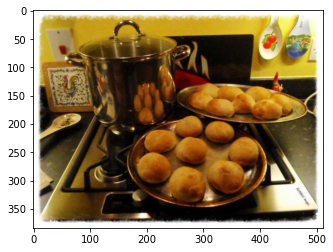

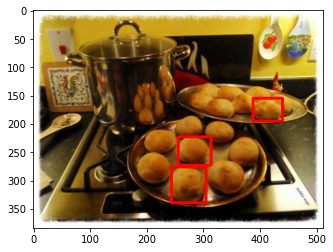

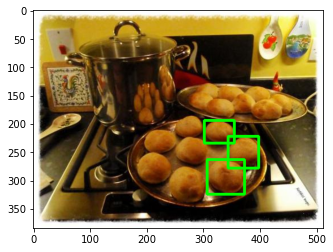

actual:  16.0 -- predicted:   5.4 -- YOLO:  10.0 -- FAMNet error:  10.6 -- YOLO error:   6.0 -- Current MAE: 8.71 -- RMSE: 9.29 -- Best VAL MAE:10000000.00 -- RMSE: 10000000.00:  80%|████████  | 4/5 [01:06<00:16, 16.73s/it]

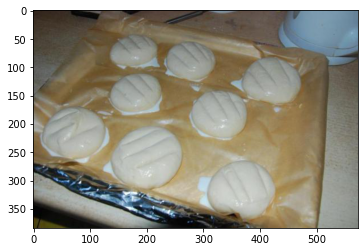

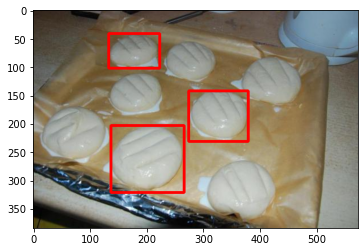

actual:   8.0 -- predicted:   8.0 -- YOLO:   1.0 -- FAMNet error:   0.0 -- YOLO error:   7.0 -- Current MAE: 6.98 -- RMSE: 8.31 -- Best VAL MAE:10000000.00 -- RMSE: 10000000.00: 100%|██████████| 5/5 [01:18<00:00, 15.72s/it]



Evaluation


  0%|          | 0/5 [00:00<?, ?it/s]

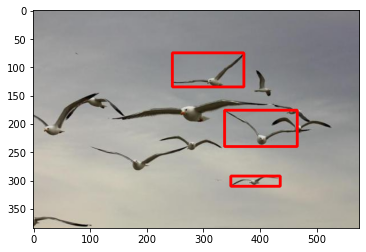

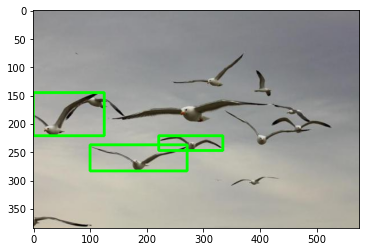

190.jpg : actual-predicted:     13,    9.7, error:    3.3. Current MAE:  3.33, RMSE:  3.33, YOLO:   10.0:  20%|██        | 1/5 [00:09<00:37,  9.46s/it]

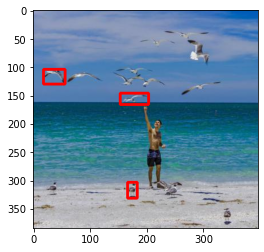

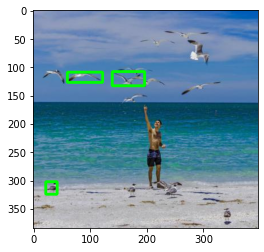

191.jpg : actual-predicted:     15,    6.7, error:    8.3. Current MAE:  5.82, RMSE:  6.32, YOLO:   15.0:  40%|████      | 2/5 [00:17<00:25,  8.65s/it]

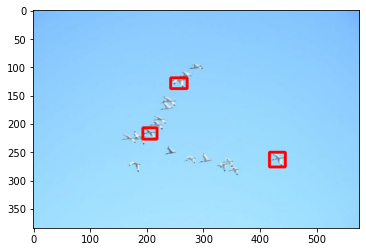

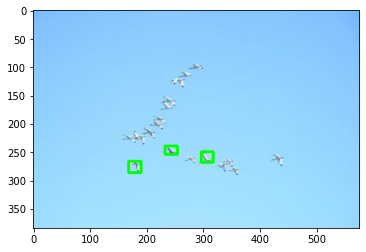

192.jpg : actual-predicted:     19,    9.6, error:    9.4. Current MAE:  7.00, RMSE:  7.47, YOLO:   10.0:  60%|██████    | 3/5 [00:27<00:18,  9.04s/it]

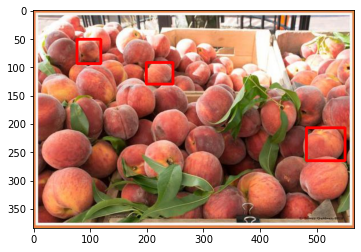

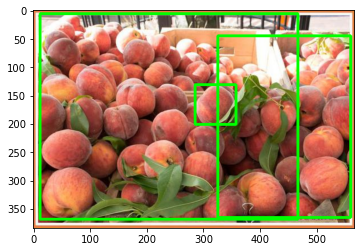

194.jpg : actual-predicted:     82,    9.7, error:   72.3. Current MAE: 23.33, RMSE: 36.74, YOLO:    3.0:  80%|████████  | 4/5 [00:38<00:09,  9.80s/it]

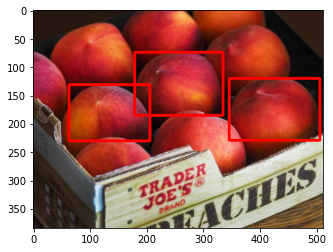

195.jpg : actual-predicted:     10,    8.6, error:    1.4. Current MAE: 18.95, RMSE: 32.87, YOLO:    1.0: 100%|██████████| 5/5 [00:44<00:00,  8.91s/it]



On evaluation data, MAE:  18.95, RMSE:  32.87
Epoch 1, Avg. Epoch Loss: 1.1017846190952696e-07 Train MAE: 6.9752232395112514 Train RMSE: 8.307939350506985 Val MAE: 18.945251274108887 Val RMSE: 32.870463684715915 Best Val MAE: 18.945251274108887 Best Val RMSE: 32.870463684715915 
Training on FSC147 train set data


  0%|          | 0/5 [00:00<?, ?it/s]

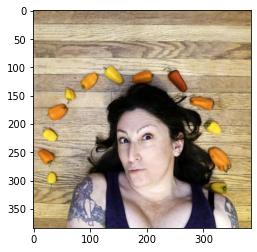

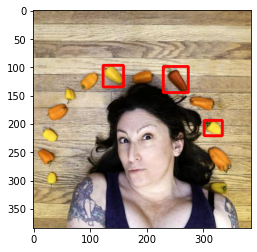

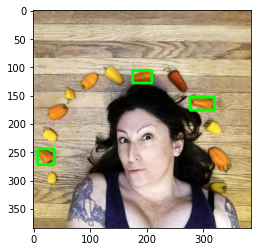

actual:  13.0 -- predicted:   6.4 -- YOLO:   6.0 -- FAMNet error:   6.6 -- YOLO error:   7.0 -- Current MAE: 6.57 -- RMSE: 6.57 -- Best VAL MAE:18.95 -- RMSE: 32.87:  20%|██        | 1/5 [00:15<01:03, 15.77s/it]

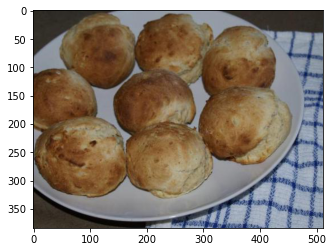

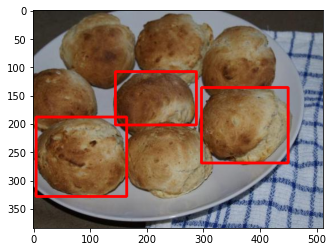

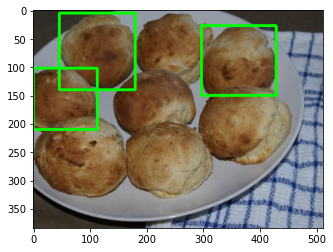

actual:   8.0 -- predicted:  10.2 -- YOLO:   7.0 -- FAMNet error:   2.2 -- YOLO error:   1.0 -- Current MAE: 4.37 -- RMSE: 4.89 -- Best VAL MAE:18.95 -- RMSE: 32.87:  40%|████      | 2/5 [00:35<00:54, 18.25s/it]

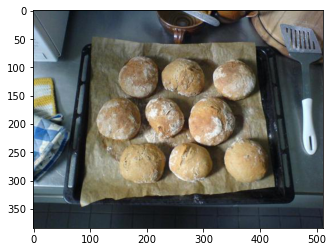

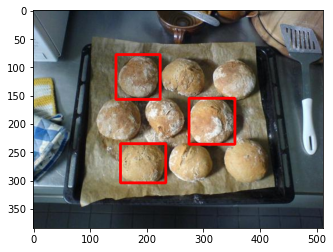

actual:   9.0 -- predicted:  11.4 -- YOLO:   2.0 -- FAMNet error:   2.4 -- YOLO error:   7.0 -- Current MAE: 3.72 -- RMSE: 4.23 -- Best VAL MAE:18.95 -- RMSE: 32.87:  60%|██████    | 3/5 [00:47<00:30, 15.17s/it]

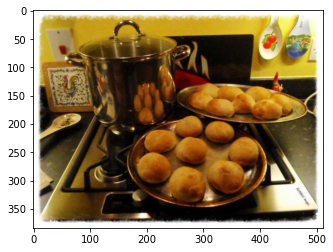

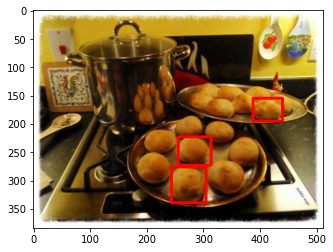

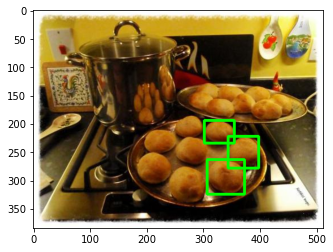

actual:  16.0 -- predicted:  12.4 -- YOLO:  10.0 -- FAMNet error:   3.6 -- YOLO error:   6.0 -- Current MAE: 3.68 -- RMSE: 4.08 -- Best VAL MAE:18.95 -- RMSE: 32.87:  80%|████████  | 4/5 [01:06<00:16, 16.75s/it]

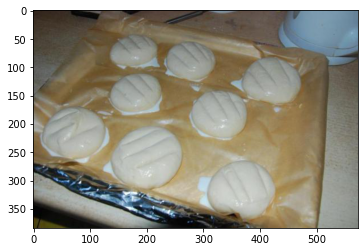

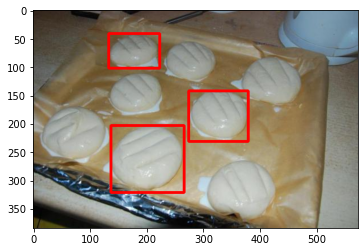

actual:   8.0 -- predicted:  15.1 -- YOLO:   1.0 -- FAMNet error:   7.1 -- YOLO error:   7.0 -- Current MAE: 4.38 -- RMSE: 4.85 -- Best VAL MAE:18.95 -- RMSE: 32.87: 100%|██████████| 5/5 [01:19<00:00, 15.82s/it]



Evaluation


  0%|          | 0/5 [00:00<?, ?it/s]

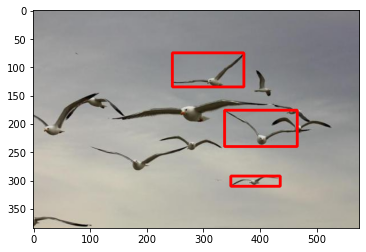

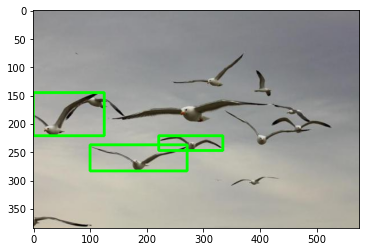

190.jpg : actual-predicted:     13,   15.9, error:    2.9. Current MAE:  2.86, RMSE:  2.86, YOLO:   10.0:  20%|██        | 1/5 [00:11<00:44, 11.22s/it]

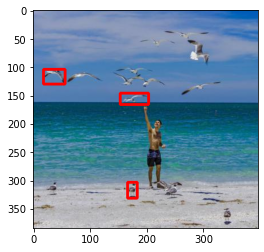

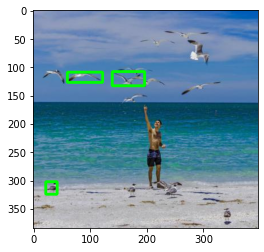

191.jpg : actual-predicted:     15,   11.0, error:    4.0. Current MAE:  3.43, RMSE:  3.48, YOLO:   15.0:  40%|████      | 2/5 [00:20<00:31, 10.33s/it]

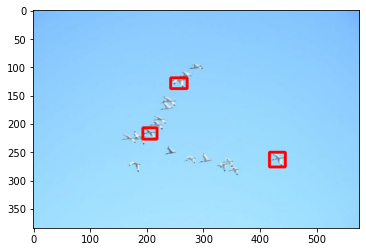

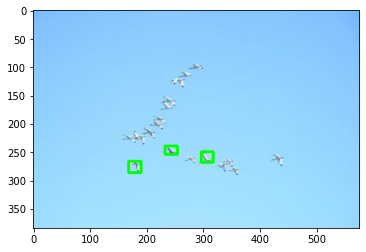

192.jpg : actual-predicted:     19,   15.8, error:    3.2. Current MAE:  3.34, RMSE:  3.38, YOLO:   10.0:  60%|██████    | 3/5 [00:31<00:21, 10.60s/it]

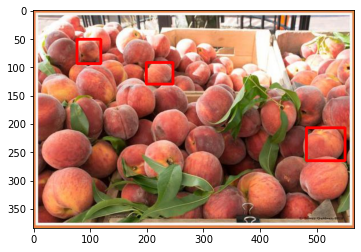

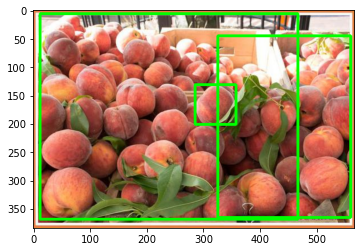

194.jpg : actual-predicted:     82,   15.8, error:   66.2. Current MAE: 19.06, RMSE: 33.24, YOLO:    3.0:  80%|████████  | 4/5 [00:43<00:10, 10.88s/it]

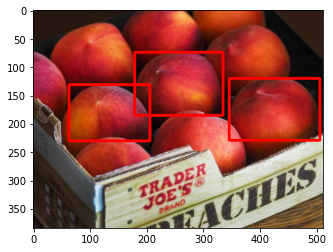

195.jpg : actual-predicted:     10,   14.1, error:    4.1. Current MAE: 16.07, RMSE: 29.79, YOLO:    1.0: 100%|██████████| 5/5 [00:49<00:00,  9.97s/it]



On evaluation data, MAE:  16.07, RMSE:  29.79
Epoch 2, Avg. Epoch Loss: 1.0843928066606168e-07 Train MAE: 4.375255393981933 Train RMSE: 4.848152140690481 Val MAE: 16.06951560974121 Val RMSE: 29.785058606387242 Best Val MAE: 16.06951560974121 Best Val RMSE: 29.785058606387242 
Training on FSC147 train set data


  0%|          | 0/5 [00:00<?, ?it/s]

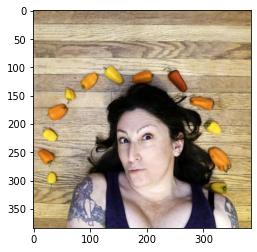

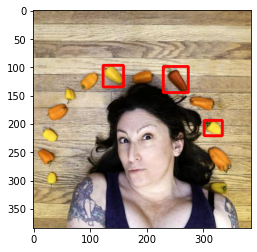

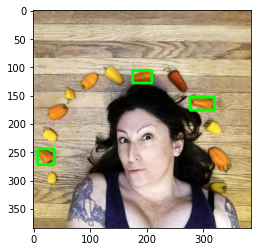

actual:  13.0 -- predicted:  10.6 -- YOLO:   6.0 -- FAMNet error:   2.4 -- YOLO error:   7.0 -- Current MAE: 2.45 -- RMSE: 2.45 -- Best VAL MAE:16.07 -- RMSE: 29.79:  20%|██        | 1/5 [00:15<01:03, 15.99s/it]

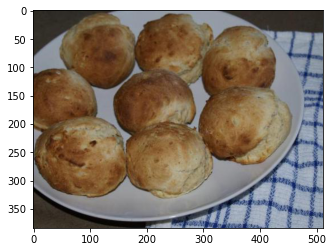

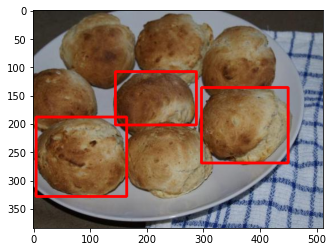

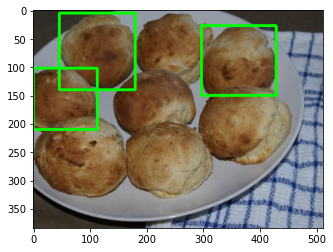

actual:   8.0 -- predicted:  14.8 -- YOLO:   7.0 -- FAMNet error:   6.8 -- YOLO error:   1.0 -- Current MAE: 4.63 -- RMSE: 5.11 -- Best VAL MAE:16.07 -- RMSE: 29.79:  40%|████      | 2/5 [00:36<00:55, 18.55s/it]

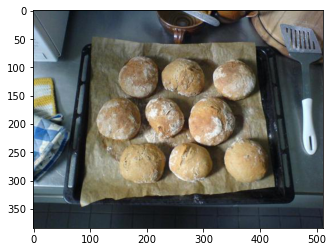

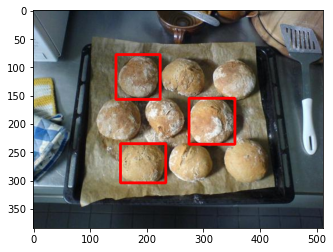

actual:   9.0 -- predicted:  15.1 -- YOLO:   2.0 -- FAMNet error:   6.1 -- YOLO error:   7.0 -- Current MAE: 5.13 -- RMSE: 5.48 -- Best VAL MAE:16.07 -- RMSE: 29.79:  60%|██████    | 3/5 [00:47<00:30, 15.41s/it]

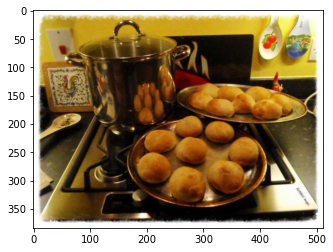

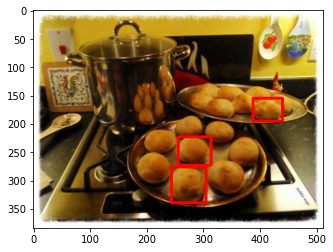

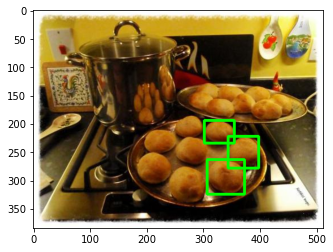

actual:  16.0 -- predicted:  15.2 -- YOLO:  10.0 -- FAMNet error:   0.8 -- YOLO error:   6.0 -- Current MAE: 4.04 -- RMSE: 4.76 -- Best VAL MAE:16.07 -- RMSE: 29.79:  80%|████████  | 4/5 [01:07<00:16, 16.88s/it]

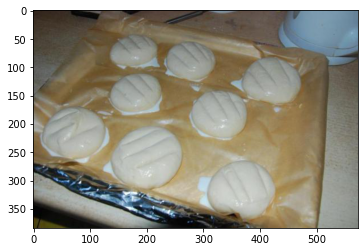

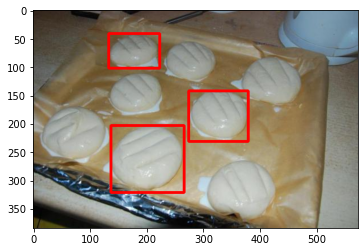

actual:   8.0 -- predicted:  17.3 -- YOLO:   1.0 -- FAMNet error:   9.3 -- YOLO error:   7.0 -- Current MAE: 5.09 -- RMSE: 5.94 -- Best VAL MAE:16.07 -- RMSE: 29.79: 100%|██████████| 5/5 [01:19<00:00, 15.93s/it]



Evaluation


  0%|          | 0/5 [00:00<?, ?it/s]

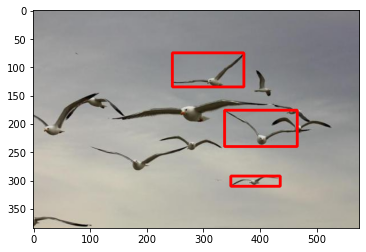

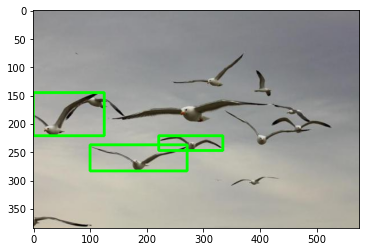

190.jpg : actual-predicted:     13,   17.0, error:    4.0. Current MAE:  4.03, RMSE:  4.03, YOLO:   10.0:  20%|██        | 1/5 [00:09<00:39,  9.80s/it]

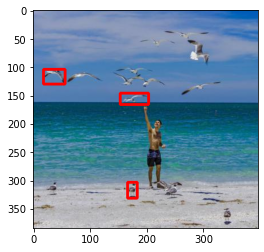

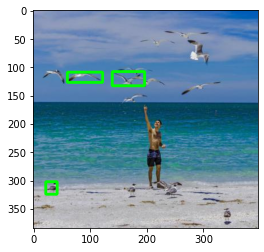

191.jpg : actual-predicted:     15,   11.8, error:    3.2. Current MAE:  3.61, RMSE:  3.63, YOLO:   15.0:  40%|████      | 2/5 [00:18<00:27,  9.17s/it]

191.jpg : actual-predicted:     15,   11.8, error:    3.2. Current MAE:  3.61, RMSE:  3.63, YOLO:   15.0:  40%|████      | 2/5 [00:20<00:30, 10.31s/it]


KeyboardInterrupt: 

In [14]:
%%time
%matplotlib inline
run_train_phase(epochs=3, backbone_model=backbone_model, regressor=regressor, yolo_model=model_yolo,
                optimizer=optimizer, criterion=criterion, annotations=annotations, 
                data_train=data_split['train'], shuffle=False, data_val=data_split['val'], 
                num_img_train=5, num_img_val=5, yolo_flag=True, yolo_threshold=3, plot_flag=True, 
                save=False, im_dir=data_path+'images_384_VarV2', gt_dir=gt_dir)

# Testing

import torch.nn as nn
from model import Resnet50FPN, CountRegressor, weights_normal_init, weights_xavier_init
from utils_ltce import MAPS, Scales, Transform,TransformTrain,extract_features, visualize_output_and_save
from PIL import Image
import os
import torch
import argparse
import json
import numpy as np
from tqdm import tqdm
from os.path import exists,join
import random
import torch.optim as optim
import torch.nn.functional as F
import cv2
import matplotlib.pyplot as plt
from collections import defaultdict
import torchvision.ops.boxes as bops
from funcs import *

In [ ]:
data_path = '/content/drive/MyDrive/LearningToCountEverything_new/data/'
output_dir = "./logsSave"
test_split = "train" #choices=["train", "test", "val"]
gpu = 0 
learning_rate = 1e-5
anno_file = data_path + 'annotation_FSC147_384.json'
data_split_file = data_path + 'Train_Test_Val_FSC_147.json'
im_dir = data_path + 'images_384_VarV2'
gt_dir = data_path + 'gt_density_map_adaptive_384_VarV2'
pre_trained_backbone = 'resnet' #choices=[resnet,wide_resnet,vgg16]
regressor = CountRegressor(6, pool='mean')
optimizer = optim.Adam(regressor.parameters(), lr = 1e-7)
criterion = nn.MSELoss().cuda()
backbone_model = Resnet50FPN()

In [ ]:
if not exists(output_dir):
    os.mkdir(output_dir)

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = str(gpu)

#criterion = nn.MSELoss().cuda()
criterion = nn.MSELoss()

#backbone.cuda()
#backbone.eval()

weights_normal_init(regressor, dev=0.001)
regressor.train()
#regressor.cuda()
optimizer = optim.Adam(regressor.parameters(), lr = learning_rate)

with open(anno_file) as f:
    annotations = json.load(f)

with open(data_split_file) as f:
    data_split = json.load(f)

In [ ]:
model_yolo = torch.hub.load('ultralytics/yolov5', 'yolov5l6', pretrained=True)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%time
%matplotlib inline
test(data_split['test'][100:], num_img=50, backbone_model=backbone_model, regressor=regressor, 
     yolo_model=model_yolo, yolo_flag=False, yolo_threshold=3, annotations=annotations, 
     plot_flag=True, im_dir=data_path+'images_384_VarV2', use_gpu=False, 
     model_path='/content/drive/MyDrive/LearningToCountEverything_new/data/pretrainedModels/FamNet_Save1.pth',
     adapt=False, gradient_steps=100, learning_rate=1e-7)